In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [2]:
df = pd.read_excel("C:/Users/Abdilfatah/Desktop/Data/BANKS_AD_DATA.xlsx")

In [3]:
df.head()

,Date,Post link,View,Post Hour,Bank,Time of day
0,26/9/2023,https://t.me/tikvahethiopia/81734,239800,10:18:00,BOA,night
1,19/9/2023,https://t.me/tikvahethiopia/81606,258400,06:53:00,BOA,night
2,15/9/2023,https://t.me/tikvahethiopia/81502,269400,03:56:00,BOA,evening
3,2023-08-09 00:00:00,https://t.me/tikvahethiopia/81338,219400,10:50:00,BOA,afternoon
4,2023-05-09 00:00:00,https://t.me/tikvahethiopia/81252,255900,01:19:00,BOA,afternoon


In [96]:
df1 = pd.read_excel("C:/Users/Abdilfatah/Desktop/Data/Apollo android review data.xlsx")

In [73]:
df1.head()

,reviewId,userName,userImage,👍,reviewCreatedVersion,at,replyContent,repliedAt,appVersion,score,Comments,Keywords,LDA_Category,Sentiment,Insight
0,910fa3ea-29db-4e6d-972b-83a7ccf0b381,Abnet Hussien,https://play-lh.googleusercontent.com/a-/ALV-U...,0,23.10.24,2023-12-05 14:47:40,NaN,NaN,23.10.24,1,it fails proceeding after sending OTP for regi...,otp,Account and Identification Issues,Negative,Influential words: fails
1,1c92335c-20cf-4dc8-8108-40c5ca406669,Paul Flower,https://play-lh.googleusercontent.com/a-/ALV-U...,0,NaN,2023-12-05 13:45:23,NaN,NaN,NaN,4,"I like all features of this app but, airtime t...",like,Operational Challenges within the App,Neutral,No significant influential words
2,1d9285f6-3570-43b1-b649-dfbffa671471,Fenkl Massawa (fenkl),https://play-lh.googleusercontent.com/a-/ALV-U...,0,23.10.24,2023-12-05 12:41:48,NaN,NaN,23.10.24,5,I like this app,like,Operational Challenges within the App,Neutral,No significant influential words
3,26a50719-d3b5-4703-a942-5640e04d824a,Mula Boad,https://play-lh.googleusercontent.com/a-/ALV-U...,0,23.10.24,2023-12-05 11:55:36,NaN,NaN,23.10.24,5,Litterally i am well exprienced in social medi...,NaN,Functional Issues and User Experience,Neutral,"Influential words: social, new"
4,4f2712f8-4b7f-45e7-8afb-90556692a6b5,yegna gojo,https://play-lh.googleusercontent.com/a-/ALV-U...,0,23.10.24,2023-12-04 06:47:48,NaN,NaN,23.10.24,5,Good,good,Positive Feedback,Positive,Influential words: Good


In [6]:
color = sns.color_palette("Blues")[4]

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Date         21 non-null     object
 1   Post link    21 non-null     object
 2   View         21 non-null     int64 
 3   Post Hour    21 non-null     object
 4   Bank         21 non-null     object
 5   Time of day  21 non-null     object
dtypes: int64(1), object(5)
memory usage: 1.1+ KB


In [8]:
df.describe()

,View
count,21.000000
mean,226880.952381
std,39312.524964
min,129400.000000
25%,212300.000000
50%,232100.000000
75%,255900.000000
max,299100.000000


In [9]:
# Data Quality Check

In [10]:
missing_values = df.isnull().sum()
print(f"Number of missing values in column_name: {missing_values}")

Number of missing values in column_name: Date           0
Post link      0
View           0
Post Hour      0
Bank           0
Time of day    0
dtype: int64


In [11]:
non_unique = df['Date'].duplicated()
print("Non-Unique Values:")
print(df[non_unique])

Non-Unique Values:
Empty DataFrame
Columns: [Date, Post link, View, Post Hour, Bank, Time of day]
Index: []


In [12]:
def column_summary(df):
    summary_data = []
    
    for col_name in df.columns:
        col_dtype = df[col_name].dtype
        num_of_nulls = df[col_name].isnull().sum()
        num_of_non_nulls = df[col_name].notnull().sum()
        num_of_distinct_values = df[col_name].nunique()
        
        if num_of_distinct_values <= 10:
            distinct_values_counts = df[col_name].value_counts().to_dict()
        else:
            top_10_values_counts = df[col_name].value_counts().head(10).to_dict()
            distinct_values_counts = {k: v for k, v in sorted(top_10_values_counts.items(), key=lambda item: item[1], reverse=True)}

        summary_data.append({
            'col_name': col_name,
            'col_dtype': col_dtype,
            'num_of_nulls': num_of_nulls,
            'num_of_non_nulls': num_of_non_nulls,
            'num_of_distinct_values': num_of_distinct_values,
            'distinct_values_counts': distinct_values_counts
        })
    
    summary_df = pd.DataFrame(summary_data)
    return summary_df

summary_df = column_summary(df)
display(summary_df)

,col_name,col_dtype,num_of_nulls,num_of_non_nulls,num_of_distinct_values,distinct_values_counts
0,Date,object,0,21,21,"{'26/9/2023': 1, 2022-03-03 00:00:00: 1, 2018-..."
1,Post link,object,0,21,21,"{'https://t.me/tikvahethiopia/81734': 1, 'http..."
2,View,int64,0,21,21,"{239800: 1, 259400: 1, 170200: 1, 213300: 1, 2..."
3,Post Hour,object,0,21,21,"{10:18:00: 1, 05:30:00: 1, 07:47:00: 1, 04:57:..."
4,Bank,object,0,21,1,{'BOA': 21}
5,Time of day,object,0,21,4,"{'afternoon': 8, 'evening ': 7, 'night ': 3, '..."


C:\Users\Abdilfatah\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


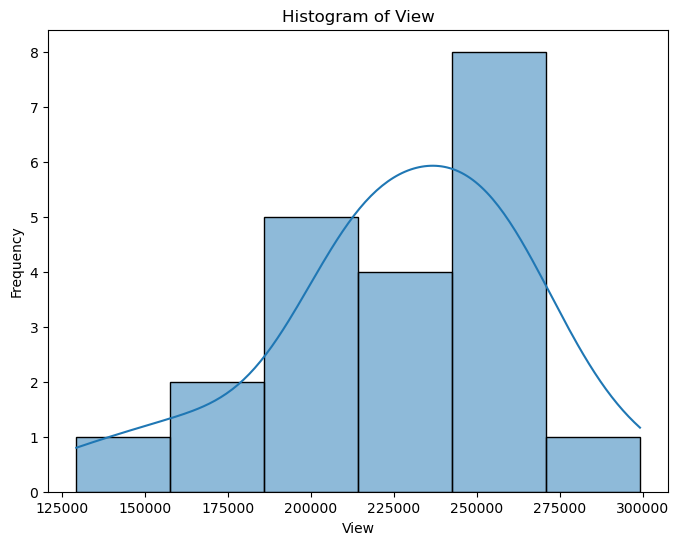

In [13]:
numerical_columns = df.select_dtypes(include=[np.number]).columns

for column in numerical_columns:
    # For continuous variables
    if len(df[column].unique()) > 10:  # Assuming if unique values > 10, consider it continuous
        plt.figure(figsize=(8, 6))
        sns.histplot(df[column], kde=True)
        plt.title(f'Histogram of {column}')
        plt.xlabel(column)
        plt.ylabel('Frequency')
        plt.show()
    else:  # For discrete or ordinal variables
        plt.figure(figsize=(8, 6))
        ax = sns.countplot(x=column, data=df)
        plt.title(f'Count of {column}')
        plt.xlabel(column)
        plt.ylabel('Count')
        
        # Annotate each bar with its count
        for p in ax.patches:
            ax.annotate(format(p.get_height(), '.0f'), 
                        (p.get_x() + p.get_width() / 2., p.get_height()), 
                        ha = 'center', va = 'center', 
                        xytext = (0, 5), 
                        textcoords = 'offset points')
        plt.show()

In [14]:
df.dtypes

Date           object
Post link      object
View            int64
Post Hour      object
Bank           object
Time of day    object
dtype: object

In [15]:
df['Date'] = pd.to_datetime(df['Date'])

C:\Users\Abdilfatah\AppData\Local\Temp\ipykernel_13712\2394721818.py:1: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['Date'] = pd.to_datetime(df['Date'])


In [16]:
df

,Date,Post link,View,Post Hour,Bank,Time of day
0,2023-09-26,https://t.me/tikvahethiopia/81734,239800,10:18:00,BOA,night
1,2023-09-19,https://t.me/tikvahethiopia/81606,258400,06:53:00,BOA,night
2,2023-09-15,https://t.me/tikvahethiopia/81502,269400,03:56:00,BOA,evening
3,2023-08-09,https://t.me/tikvahethiopia/81338,219400,10:50:00,BOA,afternoon
4,2023-05-09,https://t.me/tikvahethiopia/81252,255900,01:19:00,BOA,afternoon
5,2023-01-09,https://t.me/tikvahethiopia/81165,259100,10:20:00,BOA,afternoon
6,2023-08-29,https://t.me/tikvahethiopia/81123,232100,09:02:00,BOA,afternoon
7,2023-05-03,https://t.me/tikvahethiopia/76814,244100,09:32:00,BOA,evening
8,2023-01-26,https://t.me/tikvahethiopia/76089,129400,09:49:00,BOA,night
9,2023-01-25,https://t.me/tikvahethiopia/76075,299100,11:38:00,BOA,evening


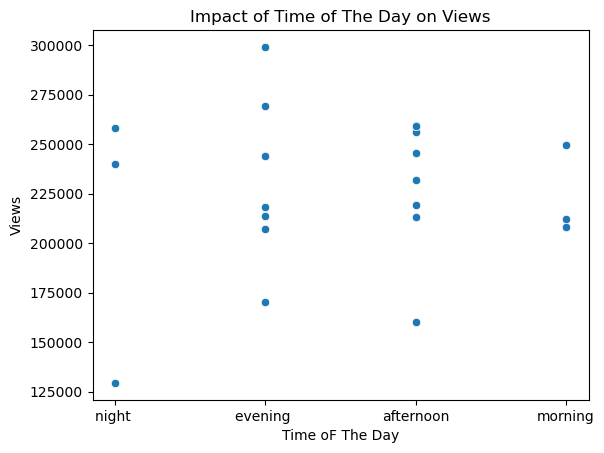

In [17]:
sns.scatterplot(x='Time of day', y='View', data=df)
plt.xlabel('Time oF The Day')
plt.ylabel('Views')
plt.title('Impact of Time of The Day on Views')
plt.show()

In [18]:
df['Post Hour'] = df['Post Hour'].apply(lambda x: x.strftime('%I:%M %p'))

In [19]:
def convert_to_hours(time_str):
    dt = datetime.strptime(time_str, '%I:%M %p')
    return dt.hour + dt.minute / 60

df['Post Hour'] = df['Post Hour'].apply(convert_to_hours)

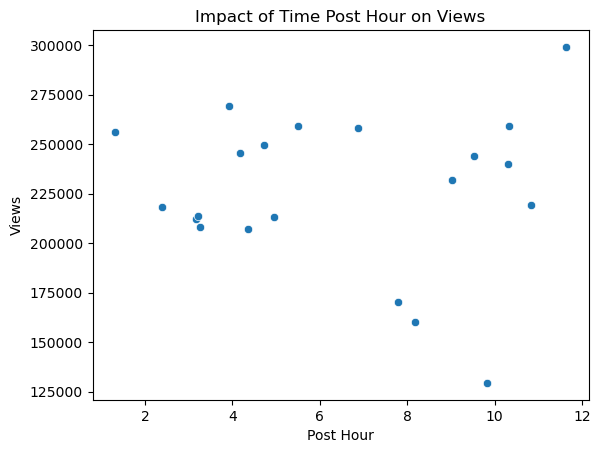

In [20]:
sns.scatterplot(x='Post Hour', y='View', data=df)
plt.xlabel('Post Hour')
plt.ylabel('Views')
plt.title('Impact of Time Post Hour on Views')
plt.show()

In [21]:
#Bivariate and Univariate Analaysis

C:\Users\Abdilfatah\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Time of day', ylabel='Count'>

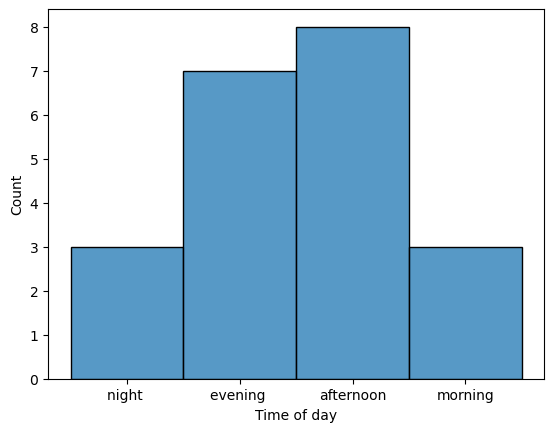

In [22]:
sns.histplot(df['Time of day'])


C:\Users\Abdilfatah\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Bank', ylabel='Count'>

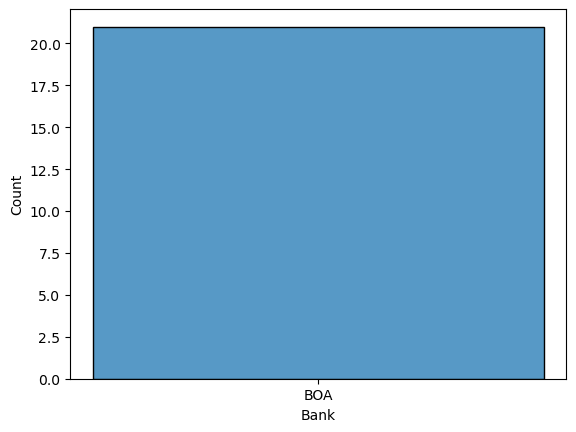

In [23]:
sns.histplot(df['Bank'])

C:\Users\Abdilfatah\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Date', ylabel='Count'>

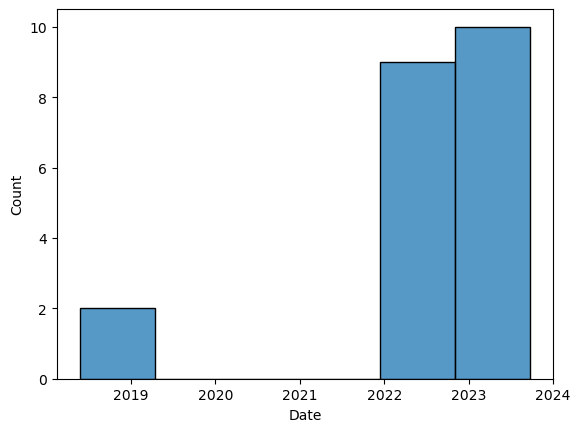

In [24]:
sns.histplot(df['Date'])


<Axes: ylabel='count'>

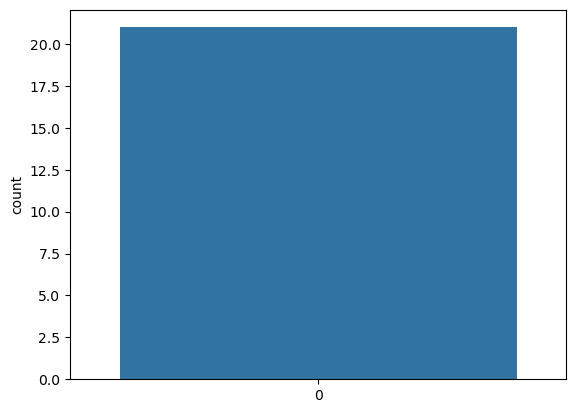

In [25]:
sns.countplot(df['View'])


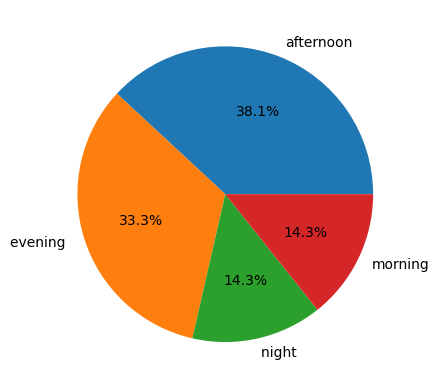

In [26]:

x = df['Time of day'].value_counts() 
plt.pie(x.values, 
        labels=x.index, 
        autopct='%1.1f%%') 
plt.show() 

<Axes: xlabel='View', ylabel='Time of day'>

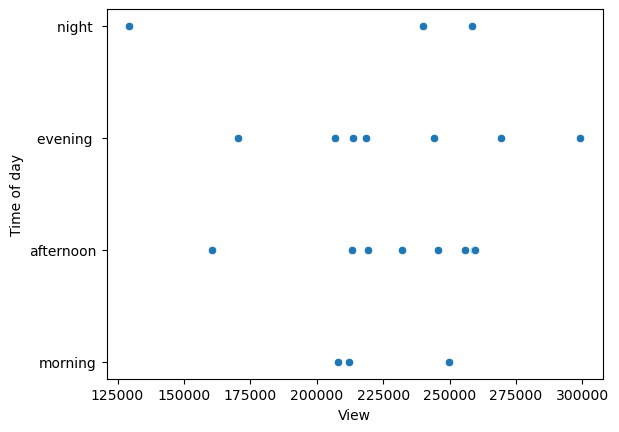

In [27]:
sns.scatterplot(x=df['View'], 
                y=df['Time of day']) 

<Axes: >

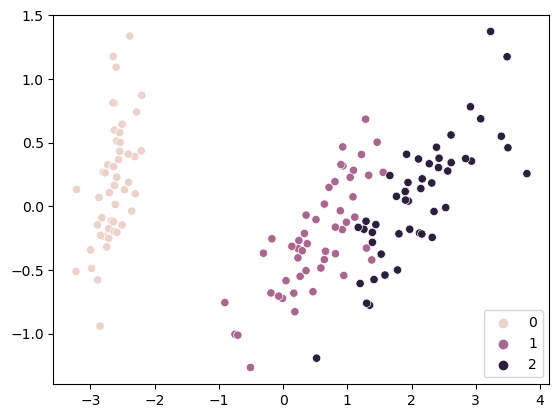

In [28]:
from sklearn import datasets, decomposition 
iris = datasets.load_iris() 
X = iris.data 
y = iris.target 
pca = decomposition.PCA(n_components=2) 
X = pca.fit_transform(X) 
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y) 

In [29]:
#Time Series Data Analysis and Data comparison

<Axes: >

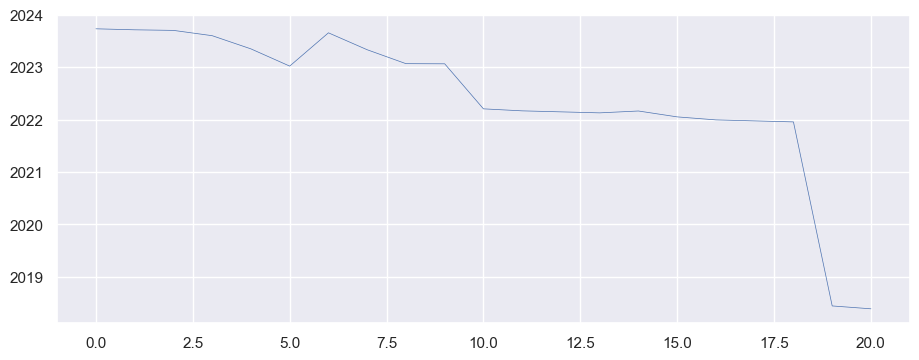

In [30]:
sns.set(rc={'figure.figsize':(11, 4)})
df['Date'].plot(linewidth=0.5)

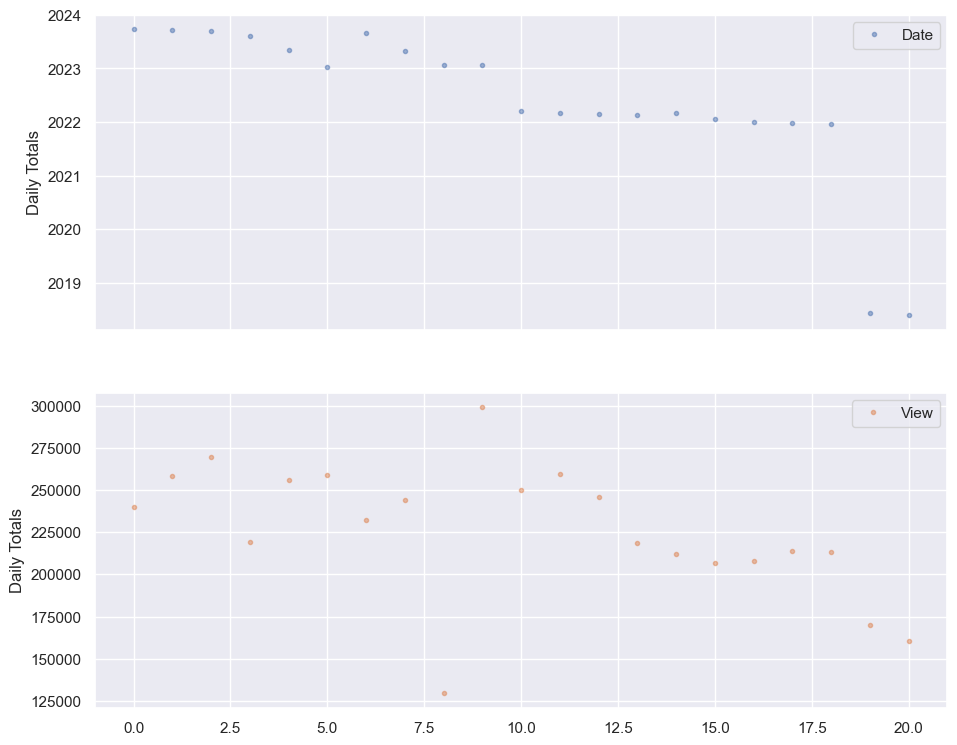

In [31]:
cols_plot = ['Date', 'Time of day', 'View']
axes = df[cols_plot].plot(marker='.', alpha=0.5, linestyle='None', figsize=(11, 9), subplots=True)
for ax in axes:
    ax.set_ylabel('Daily Totals')

In [32]:
#Correlation between different datasets 

In [71]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   reviewId              100 non-null    object        
 1   userName              100 non-null    object        
 2   userImage             100 non-null    object        
 3   👍                     100 non-null    int64         
 4   reviewCreatedVersion  100 non-null    object        
 5   at                    100 non-null    datetime64[ns]
 6   appVersion            100 non-null    object        
 7   score                 100 non-null    int64         
 8   Comments              100 non-null    object        
 9   Keywords              100 non-null    object        
 10  LDA_Category          100 non-null    object        
 11  Sentiment             100 non-null    object        
 12  Insight               100 non-null    object        
dtypes: datetime64[ns](1),

In [70]:
df1.describe()

,👍,at,score
count,100.000000,100,100.000000
mean,9.160000,2023-11-09 06:06:40.990000128,3.530000
min,0.000000,2023-10-09 10:44:00,1.000000
25%,0.000000,2023-10-25 18:18:54.750000128,1.750000
50%,0.000000,2023-11-09 18:23:58,5.000000
75%,1.000000,2023-11-25 15:13:10.249999872,5.000000
max,374.000000,2023-12-05 14:47:40,5.000000
std,45.394504,NaN,1.720083


In [35]:
def column_summary(df1):
    summary_data = []
    
    for col_name in df1.columns:
        col_dtype = df1[col_name].dtype
        num_of_nulls = df1[col_name].isnull().sum()
        num_of_non_nulls = df1[col_name].notnull().sum()
        num_of_distinct_values = df1[col_name].nunique()
        
        if num_of_distinct_values <= 10:
            distinct_values_counts = df1[col_name].value_counts().to_dict()
        else:
            top_10_values_counts = df1[col_name].value_counts().head(10).to_dict()
            distinct_values_counts = {k: v for k, v in sorted(top_10_values_counts.items(), key=lambda item: item[1], reverse=True)}

        summary_data.append({
            'col_name': col_name,
            'col_dtype': col_dtype,
            'num_of_nulls': num_of_nulls,
            'num_of_non_nulls': num_of_non_nulls,
            'num_of_distinct_values': num_of_distinct_values,
            'distinct_values_counts': distinct_values_counts
        })
    
    summary_df = pd.DataFrame(summary_data)
    return summary_df

summary_df = column_summary(df1)
display(summary_df)

,col_name,col_dtype,num_of_nulls,num_of_non_nulls,num_of_distinct_values,distinct_values_counts
0,reviewId,object,0,100,100,"{'910fa3ea-29db-4e6d-972b-83a7ccf0b381': 1, 'f..."
1,userName,object,0,100,100,"{'Abnet Hussien': 1, 'noah abe': 1, 'Zita Zita..."
2,userImage,object,0,100,100,{'https://play-lh.googleusercontent.com/a-/ALV...
3,👍,int64,0,100,12,"{0: 70, 1: 13, 3: 4, 2: 3, 5: 3, 43: 1, 39: 1,..."
4,reviewCreatedVersion,object,28,72,6,"{'23.10.24': 43, '23.09.23': 21, '23.08.03': 4..."
5,at,datetime64[ns],0,100,100,"{2023-12-05 14:47:40: 1, 2023-11-05 01:24:22: ..."
6,replyContent,float64,100,0,0,{}
7,repliedAt,float64,100,0,0,{}
8,appVersion,object,28,72,6,"{'23.10.24': 43, '23.09.23': 21, '23.08.03': 4..."
9,score,int64,0,100,5,"{5: 51, 1: 25, 4: 9, 2: 8, 3: 7}"


In [36]:
# We Need to clean data since it has multiple columns which have more than 50% null values.

In [98]:
# delete rows which are mainly empty
to_drop = ['replyContent', 'repliedAt']
df1.drop(to_drop, inplace=True, axis=1)

In [75]:
df1.head()

,reviewId,userName,userImage,👍,reviewCreatedVersion,at,appVersion,score,Comments,Keywords,LDA_Category,Sentiment,Insight
0,910fa3ea-29db-4e6d-972b-83a7ccf0b381,Abnet Hussien,https://play-lh.googleusercontent.com/a-/ALV-U...,0,23.10.24,2023-12-05 14:47:40,23.10.24,1,it fails proceeding after sending OTP for regi...,otp,Account and Identification Issues,Negative,Influential words: fails
1,1c92335c-20cf-4dc8-8108-40c5ca406669,Paul Flower,https://play-lh.googleusercontent.com/a-/ALV-U...,0,NaN,2023-12-05 13:45:23,NaN,4,"I like all features of this app but, airtime t...",like,Operational Challenges within the App,Neutral,No significant influential words
2,1d9285f6-3570-43b1-b649-dfbffa671471,Fenkl Massawa (fenkl),https://play-lh.googleusercontent.com/a-/ALV-U...,0,23.10.24,2023-12-05 12:41:48,23.10.24,5,I like this app,like,Operational Challenges within the App,Neutral,No significant influential words
3,26a50719-d3b5-4703-a942-5640e04d824a,Mula Boad,https://play-lh.googleusercontent.com/a-/ALV-U...,0,23.10.24,2023-12-05 11:55:36,23.10.24,5,Litterally i am well exprienced in social medi...,NaN,Functional Issues and User Experience,Neutral,"Influential words: social, new"
4,4f2712f8-4b7f-45e7-8afb-90556692a6b5,yegna gojo,https://play-lh.googleusercontent.com/a-/ALV-U...,0,23.10.24,2023-12-04 06:47:48,23.10.24,5,Good,good,Positive Feedback,Positive,Influential words: Good


In [76]:
df1.dtypes

reviewId                        object
userName                        object
userImage                       object
👍                                int64
reviewCreatedVersion            object
at                      datetime64[ns]
appVersion                      object
score                            int64
Comments                        object
Keywords                        object
LDA_Category                    object
Sentiment                       object
Insight                         object
dtype: object

In [106]:
df1['reviewCreatedVersion'] = df1['reviewCreatedVersion'].fillna(df1['reviewCreatedVersion'].mode().iloc[0])
df1['appVersion'] = df1['appVersion'].fillna(df1['appVersion'].mode().iloc[0])
df1['Keywords'] = df1['Keywords'].fillna(df1['Keywords'].mode().iloc[0])

In [107]:
df1.head()

,reviewId,userName,userImage,👍,reviewCreatedVersion,at,appVersion,score,Comments,Keywords,LDA_Category,Sentiment,Insight
0,910fa3ea-29db-4e6d-972b-83a7ccf0b381,Abnet Hussien,https://play-lh.googleusercontent.com/a-/ALV-U...,0,23.10.24,2023-12-05 14:47:40,23.10.24,1,it fails proceeding after sending OTP for regi...,otp,Account and Identification Issues,Negative,Influential words: fails
1,1c92335c-20cf-4dc8-8108-40c5ca406669,Paul Flower,https://play-lh.googleusercontent.com/a-/ALV-U...,0,23.10.24,2023-12-05 13:45:23,23.10.24,4,"I like all features of this app but, airtime t...",like,Operational Challenges within the App,Neutral,No significant influential words
2,1d9285f6-3570-43b1-b649-dfbffa671471,Fenkl Massawa (fenkl),https://play-lh.googleusercontent.com/a-/ALV-U...,0,23.10.24,2023-12-05 12:41:48,23.10.24,5,I like this app,like,Operational Challenges within the App,Neutral,No significant influential words
3,26a50719-d3b5-4703-a942-5640e04d824a,Mula Boad,https://play-lh.googleusercontent.com/a-/ALV-U...,0,23.10.24,2023-12-05 11:55:36,23.10.24,5,Litterally i am well exprienced in social medi...,good,Functional Issues and User Experience,Neutral,"Influential words: social, new"
4,4f2712f8-4b7f-45e7-8afb-90556692a6b5,yegna gojo,https://play-lh.googleusercontent.com/a-/ALV-U...,0,23.10.24,2023-12-04 06:47:48,23.10.24,5,Good,good,Positive Feedback,Positive,Influential words: Good


C:\Users\Abdilfatah\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='reviewCreatedVersion', ylabel='Count'>

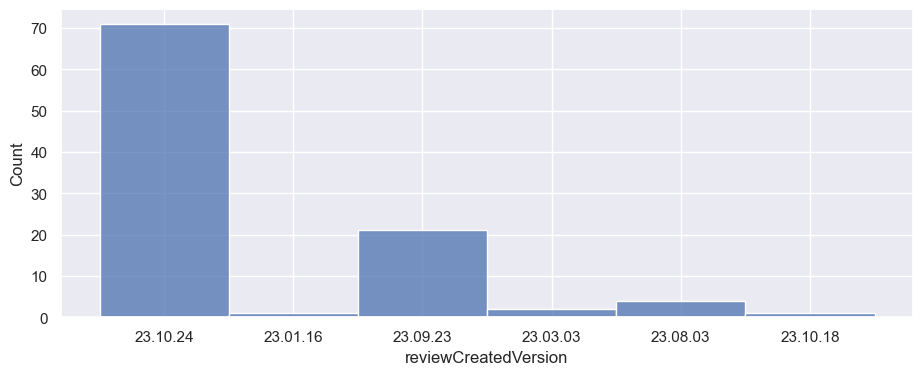

In [108]:
sns.histplot(df1['reviewCreatedVersion'])

C:\Users\Abdilfatah\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='score', ylabel='Count'>

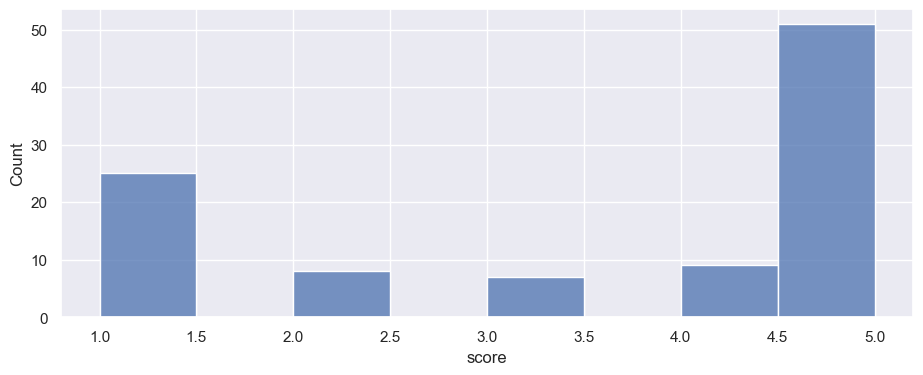

In [109]:
sns.histplot(df1['score'])

In [110]:
df1.groupby("score")["reviewCreatedVersion"].value_counts()

score  reviewCreatedVersion
1      23.10.24                18
       23.09.23                 5
       23.03.03                 1
       23.10.18                 1
2      23.10.24                 5
       23.09.23                 3
3      23.10.24                 4
       23.09.23                 2
       23.08.03                 1
4      23.10.24                 6
       23.09.23                 2
       23.01.16                 1
5      23.10.24                38
       23.09.23                 9
       23.08.03                 3
       23.03.03                 1
Name: count, dtype: int64

In [ ]:
# Checking correlation between the two datasets

In [112]:
combined_df = pd.concat([df['Date'], df1['at']], axis=1)
correlation = combined_df.corr().iloc[0, 1]
print(correlation)

0.6662322820158476


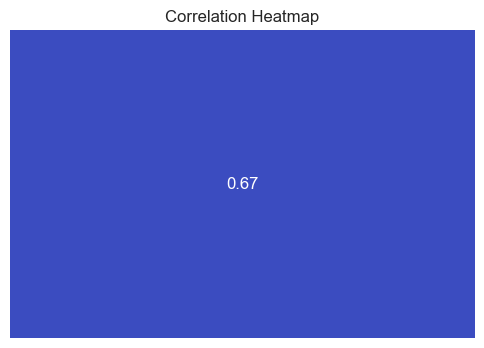

In [113]:
plt.figure(figsize=(6, 4))
sns.heatmap([[correlation]], annot=True, cmap='coolwarm', cbar=False)
plt.title("Correlation Heatmap")
plt.xticks([])  # Hide x-axis labels
plt.yticks([])  # Hide y-axis labels
plt.show()